<a href="https://colab.research.google.com/github/SDMLABSTUDY/TSP_PROBLEM_1/blob/main/TSP_PROBLEM_%EA%B2%BD%EB%A1%9C%EC%8B%9C%EA%B0%81%ED%99%94_260204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Path: /content/drive/MyDrive/SDMLAB/260129_TSP/cycle101.in
✅ 파일을 찾았습니다! Greedy 알고리즘을 실행합니다.

[Result] Greedy Algorithm (Nearest Neighbor)
Target File : cycle101.in
Cities (N)  : 101
Total Dist  : 926.0428
Time Taken  : 0.0005 sec

🎨 Visualizing Greedy Path...


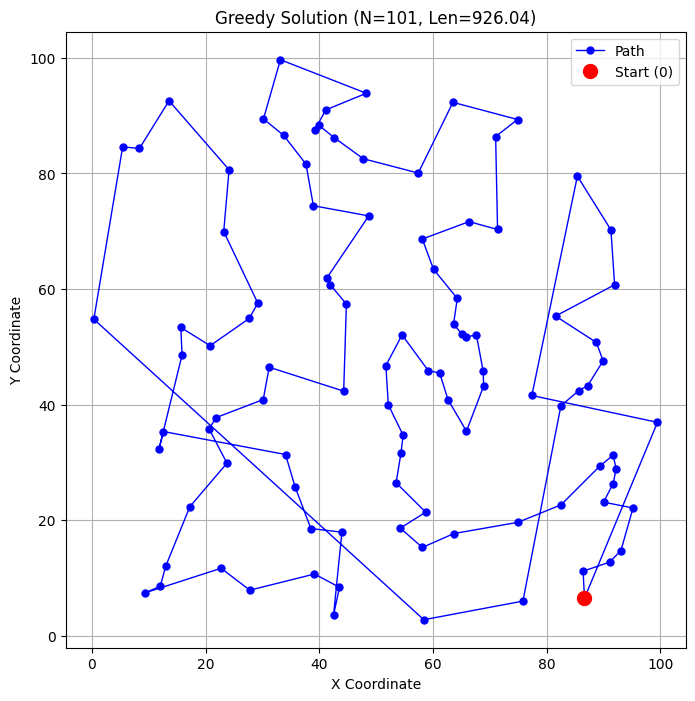

In [ ]:
# @title greedy algorithm 경로 시각화
import random
import math
import time
import matplotlib.pyplot as plt
import os
from google.colab import drive

# ==========================================
# 1. 구글 드라이브 연결 및 경로 설정
# ==========================================
drive.mount('/content/drive')

# 사용자 경로 (본인 경로에 맞게 수정 필요)
base_path = "/content/drive/MyDrive/SDMLAB/260129_TSP"

# ==========================================
# 2. TSP 클래스 (GA 관련 부분 제외하고 필요한 부분만 유지)
# ==========================================
class TSP_Solver:
    def __init__(self, file_path):
        self.cities = []
        self.n_cities = 0
        self.limit_time = 0

        self.load_data(file_path)
        self.dist_matrix = self.precompute_distances()

    def load_data(self, file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

        self.n_cities = int(float(lines[0]))
        self.limit_time = float(lines[-1])

        coord_lines = lines[1:1 + self.n_cities]
        self.cities = []
        for i, ln in enumerate(coord_lines):
            parts = ln.split()
            x, y = map(float, parts)
            self.cities.append((x, y))

    def precompute_distances(self):
        matrix = [[0.0] * self.n_cities for _ in range(self.n_cities)]
        for i in range(self.n_cities):
            for j in range(i + 1, self.n_cities):
                d = math.sqrt((self.cities[i][0] - self.cities[j][0]) ** 2 +
                              (self.cities[i][1] - self.cities[j][1]) ** 2)
                matrix[i][j] = d
                matrix[j][i] = d
        return matrix

    def get_fitness(self, tour):
        distance = 0
        for i in range(self.n_cities):
            a = tour[i]
            b = tour[(i + 1) % self.n_cities]
            distance += self.dist_matrix[a][b]
        return distance

    def greedy_solution(self):
        # Nearest Neighbor 알고리즘 (Start Node = 0 고정)
        start = 0
        n = self.n_cities
        dm = self.dist_matrix
        visited = [False] * n
        tour = [start]
        visited[start] = True
        cur = start

        for k in range(n - 1):
            nxt = None
            best_d = float("inf")
            for j in range(n):
                if not visited[j]:
                    d = dm[cur][j]
                    if d < best_d:
                        best_d = d
                        nxt = j
            tour.append(nxt)
            visited[nxt] = True
            cur = nxt

        best_len = self.get_fitness(tour)
        return tour, best_len

# ==========================================
# [시각화 함수]
# ==========================================
def plot_tsp_solution(cities, tour, title="TSP Solution"):
    plt.figure(figsize=(8, 8))

    # 1. 경로 좌표 추출
    path_x = []
    path_y = []
    for city_idx in tour:
        x, y = cities[city_idx]
        path_x.append(x)
        path_y.append(y)

    # 2. 마지막 도시 -> 시작 도시 연결 (Cycle)
    path_x.append(path_x[0])
    path_y.append(path_y[0])

    # 3. 그리기
    plt.plot(path_x, path_y, 'b-', marker='o', markersize=5, linewidth=1, label='Path') # 파란 선
    plt.plot(path_x[0], path_y[0], 'ro', markersize=10, label='Start (0)')    # 시작점 빨간색 강조

    # 도시 번호 표시 (선택사항, 도시가 너무 많으면 지저분할 수 있음)
    if len(cities) <= 51:
        for i, txt in enumerate(tour):
            plt.annotate(txt, (path_x[i], path_y[i]), xytext=(3, 3), textcoords='offset points', fontsize=8)

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

# ==========================================
# 3. 메인 실행부 (Greedy Only)
# ==========================================
if __name__ == "__main__":

    # 1. 대상 파일명 설정 (cycle101.in 등 원하는 파일로 변경)
    target_filename = "cycle101.in"

    # 전체 경로 결합
    full_path = os.path.join(base_path, target_filename)
    print(f"Dataset Path: {full_path}")

    # 파일 존재 여부 확인
    if not os.path.exists(full_path):
        print(f"❌ 오류: 파일을 찾을 수 없습니다.: {full_path}")
    else:
        print(f"✅ 파일을 찾았습니다! Greedy 알고리즘을 실행합니다.")

        # 2. 객체 생성 및 데이터 로드
        solver = TSP_Solver(full_path)

        # 3. Greedy 알고리즘 실행
        start_time = time.time()
        greedy_tour, greedy_len = solver.greedy_solution()
        end_time = time.time()

        print(f"\n==========================================")
        print(f"[Result] Greedy Algorithm (Nearest Neighbor)")
        print(f"Target File : {target_filename}")
        print(f"Cities (N)  : {solver.n_cities}")
        print(f"Total Dist  : {greedy_len:.4f}")
        print(f"Time Taken  : {end_time - start_time:.4f} sec")
        print("==========================================\n")

        # 4. 시각화
        print("🎨 Visualizing Greedy Path...")
        plot_title = f"Greedy Solution (N={solver.n_cities}, Len={greedy_len:.2f})"
        plot_tsp_solution(solver.cities, greedy_tour, title=plot_title)

Mounted at /content/drive
Dataset Path: /content/drive/MyDrive/SDMLAB/260129_TSP/cycle101.in
✅ 파일을 찾았습니다! 실험을 시작합니다.

[Experiment] cycle101.in (With Greedy Init)
Greedy(start=0) Len = 926.0428
Time Limit          = 216.0 seconds per seed
------------------------------------------
seed |  GA_best_len | improve(%) | Generations
----------------------------------------------------
   0 |     814.6259 |      12.03 |       56650
   1 |     819.2362 |      11.53 |       57116
   2 |     828.5394 |      10.53 |       56875
   3 |     811.0499 |      12.42 |       56853
   4 |     795.0474 |      14.15 |       57187
----------------------------------------------------
[Summary] cycle101.in (5 Runs)
GA_best_len (Mean ± Std) : 813.6997 ± 12.3152
Improvement (Mean ± Std) : 12.13% ± 1.33%


🎨 Visualizing Best Tours for each seed...


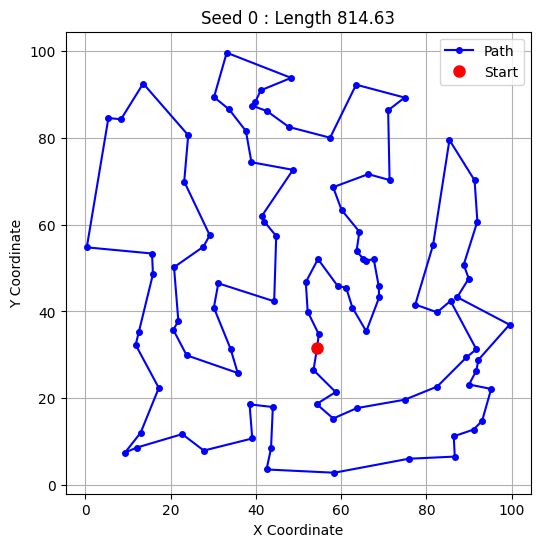

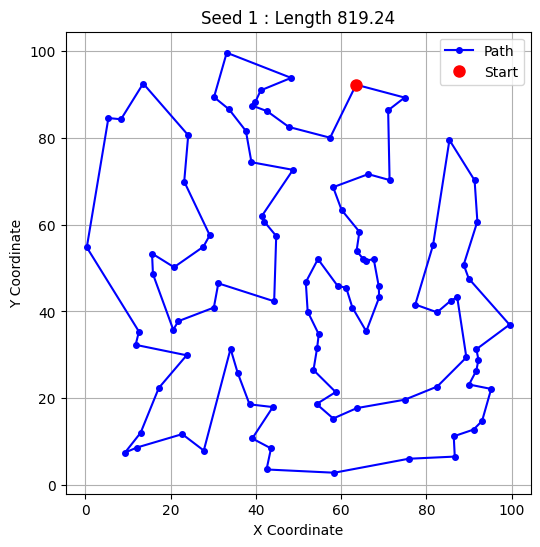

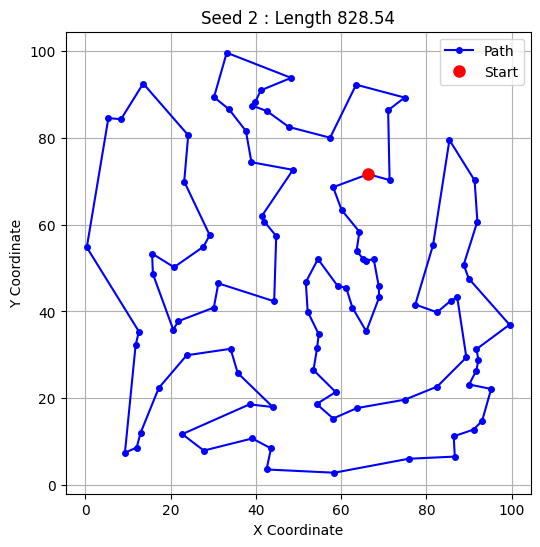

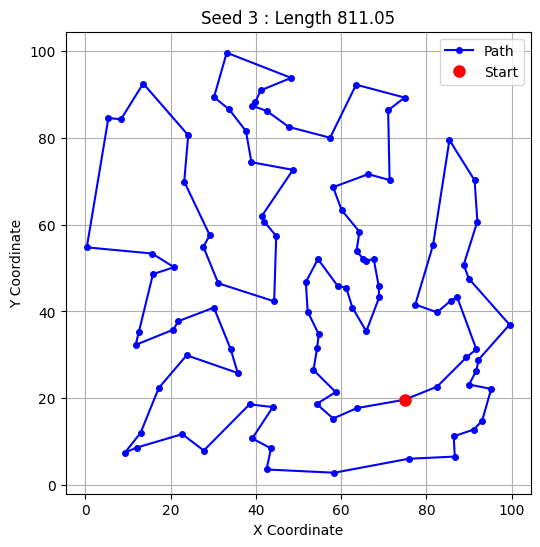

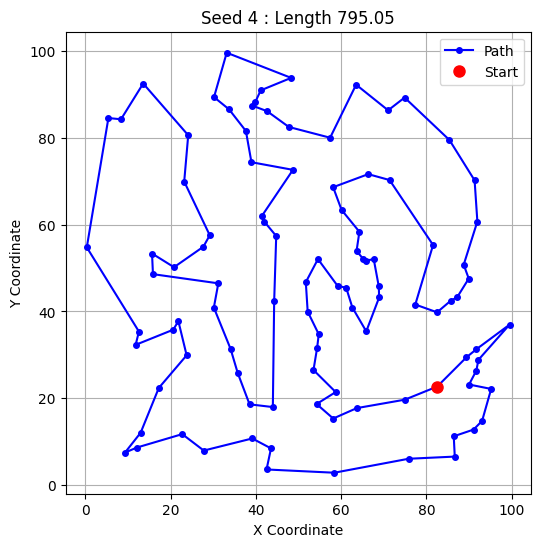

In [ ]:
# @title Plot
import random
import math
import time
import statistics
import copy
from collections import Counter
import matplotlib.pyplot as plt
import os
from google.colab import drive

# ==========================================
# 1. 구글 드라이브 연결 및 경로 설정
# ==========================================
drive.mount('/content/drive')

# 사용자 경로 (본인 경로에 맞게 수정 필요)
base_path = "/content/drive/MyDrive/SDMLAB/260129_TSP"

# ==========================================
# 2. TSP_GA 클래스
# ==========================================
class TSP_GA:
    def __init__(self, file_path, params, seed=0):
        self.params = params
        self.rng = random.Random(seed)

        self.cities = []
        self.limit_time = 0
        self.n_cities = 0

        self.load_data(file_path)
        self.dist_matrix = self.precompute_distances()

        self.trace_t = []
        self.trace_best = []

    def load_data(self, file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

        self.n_cities = int(float(lines[0]))
        self.limit_time = float(lines[-1])

        coord_lines = lines[1:1 + self.n_cities]
        self.cities = []
        for i, ln in enumerate(coord_lines):
            parts = ln.split()
            if len(parts) != 2:
                raise ValueError(f"{i + 1}번째 좌표 줄이 'x y' 형식이 아닙니다: '{ln}'")
            x, y = map(float, parts)
            self.cities.append((x, y))

    def precompute_distances(self):
        matrix = [[0.0] * self.n_cities for _ in range(self.n_cities)]
        for i in range(self.n_cities):
            for j in range(i + 1, self.n_cities):
                d = math.sqrt((self.cities[i][0] - self.cities[j][0]) ** 2 +
                              (self.cities[i][1] - self.cities[j][1]) ** 2)
                matrix[i][j] = d
                matrix[j][i] = d
        return matrix

    def get_fitness(self, chromosome):
        distance = 0
        for i in range(self.n_cities):
            a = chromosome[i]
            b = chromosome[(i + 1) % self.n_cities]
            distance += self.dist_matrix[a][b]
        return distance

    def greedy_solution(self):
        start = 0
        n = self.n_cities
        dm = self.dist_matrix
        visited = [False] * n
        tour = [start]
        visited[start] = True
        cur = start

        for k in range(n - 1):
            nxt = None
            best_d = float("inf")
            for j in range(n):
                if not visited[j]:
                    d = dm[cur][j]
                    if d < best_d:
                        best_d = d
                        nxt = j
            tour.append(nxt)
            visited[nxt] = True
            cur = nxt

        best_len = self.get_fitness(tour)
        return tour, best_len

    def random_tour(self):
        t = list(range(self.n_cities))
        self.rng.shuffle(t)
        return t

    def sort_population(self, population):
        population.sort(key=lambda x: x[1])
        return population

    def selection_operater(self, population):
        t = self.params['TOURNAMENT_T']

        def tourna():
            ch1, fit1 = population[self.rng.randrange(len(population))]
            ch2, fit2 = population[self.rng.randrange(len(population))]
            if fit2 < fit1:
                ch1, ch2 = ch2, ch1
                fit1, fit2 = fit2, fit1
            r = self.rng.random()
            if t > r:
                return ch1
            else:
                return ch2

        mom_ch = tourna()
        dad_ch = tourna()
        return mom_ch, dad_ch

    def crossover_operater(self, mom, dad):
        n = self.n_cities
        l = self.rng.randrange(n)
        r = self.rng.randrange(n)
        while r == l:
            r = self.rng.randrange(n)
        if l > r:
            l, r = r, l

        child = [-1] * n
        child[l:r + 1] = mom[l:r + 1]
        used = set(child[l:r + 1])
        idx = (r + 1) % n
        for city in dad:
            if city in used:
                continue
            while child[idx] != -1:
                idx = (idx + 1) % n
            child[idx] = city
            used.add(city)
        return child

    def mutation_operater(self, chromosome):
        n = self.n_cities
        a = self.rng.randrange(n)
        b = self.rng.randrange(n)
        if a > b:
            a, b = b, a
        if a == b:
            return chromosome[:]
        ch = chromosome[:]
        ch[a:b+1] = reversed(ch[a:b+1])
        return ch

    def replacement_operator(self, population, offsprings):
        merged = population + offsprings
        merged.sort(key=lambda x: x[1])
        return merged[:self.params['POP_SIZE']]

    # [수정] 외부에서 초기 해(Greedy)를 받아올 수 있도록 init_tours 매개변수 추가
    def search(self, init_tours=None):
        generation = 0
        population = []

        # 1-1) Greedy Seed 주입 (전달받은 해가 있다면 우선 추가)
        if init_tours:
            for tour in init_tours:
                if len(population) < self.params["POP_SIZE"]:
                    fit = self.get_fitness(tour)
                    population.append((tour, fit))

        # 1-2) 남은 자리는 랜덤 해로 채우기
        while len(population) < self.params["POP_SIZE"]:
            ch = self.random_tour()
            fit = self.get_fitness(ch)
            population.append((ch, fit))

        population = self.sort_population(population)

        # 2) 시간 및 trace 초기화
        start_time = time.time()
        last_log = 0.0
        self.trace_t = [0.0]
        self.trace_best = [population[0][1]]
        log_interval = self.params.get("LOG_INTERVAL_SEC", 0.2)

        # 3) 제한시간 루프
        while (time.time() - start_time) < self.limit_time:
            generation += 1
            offsprings = []

            for _ in range(self.params["NUM_OFFSPRING"]):
                mom_ch, dad_ch = self.selection_operater(population)
                child = self.crossover_operater(mom_ch, dad_ch)

                if self.rng.random() < self.params["MUT_RATE"]:
                    child = self.mutation_operater(child)

                child_fit = self.get_fitness(child)
                offsprings.append((child, child_fit))

            population = self.replacement_operator(population, offsprings)

            elapsed = time.time() - start_time
            if elapsed - last_log >= log_interval:
                last_log = elapsed
                self.trace_t.append(elapsed)
                self.trace_best.append(population[0][1])

            # 조기 종료(Early Stopping) 제거: 시간 끝까지 돔
            # CONV_DOM_RATIO를 1.0보다 크게 설정하여 사실상 비활성화

        best_ch, best_fit = population[0]
        elapsed = time.time() - start_time
        return best_ch, best_fit, generation, elapsed, (self.trace_t, self.trace_best)

# ==========================================
# [추가] 경로 시각화 함수
# ==========================================
def plot_tsp_solution(cities, tour, title="TSP Solution"):
    plt.figure(figsize=(6, 6))

    # 1. 경로 좌표 추출
    path_x = []
    path_y = []
    for city_idx in tour:
        x, y = cities[city_idx]
        path_x.append(x)
        path_y.append(y)

    # 2. 마지막 도시 -> 시작 도시 연결 (Cycle)
    path_x.append(path_x[0])
    path_y.append(path_y[0])

    # 3. 그리기
    plt.plot(path_x, path_y, 'b-', marker='o', markersize=4, label='Path') # 파란 선 + 점
    plt.plot(path_x[0], path_y[0], 'ro', markersize=8, label='Start')    # 시작점 빨간색 강조

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

# ==========================================
# 3. 메인 실행부
# ==========================================
if __name__ == "__main__":

    # 3. 대상 파일명 설정
    target_filename = "cycle101.in"

    # 전체 경로 결합
    full_path = os.path.join(base_path, target_filename)

    print(f"Dataset Path: {full_path}")

    # 파일 존재 여부 확인
    if not os.path.exists(full_path):
        print(f"❌ 오류: 파일을 찾을 수 없습니다.: {full_path}")
    else:
        print(f"✅ 파일을 찾았습니다! 실험을 시작합니다.")

        seeds = [0, 1, 2, 3, 4]

        # 파라미터 설정
        params = {
            'MUT_RATE': 0.15,
            'POP_SIZE': 120,
            'NUM_OFFSPRING': 120,
            'TOURNAMENT_T': 0.75,
            'LOG_INTERVAL_SEC': 0.5, # 로그 간격 조정
            # 조기 종료를 사실상 끄기 위해 비율을 1.0 초과로 설정
            'CONV_DOM_RATIO': 1.1,
        }

        print(f"\n==========================================")
        print(f"[Experiment] {target_filename} (With Greedy Init)")

        # 1) Greedy (Baseline) 계산 및 경로 저장
        tsp_greedy = TSP_GA(full_path, params, seed=0)
        greedy_tour, greedy_len = tsp_greedy.greedy_solution() # [중요] 경로(greedy_tour)도 받음

        # 파일에서 읽어온 제한 시간 확인
        limit_time_val = tsp_greedy.limit_time

        print(f"Greedy(start=0) Len = {greedy_len:.4f}")
        print(f"Time Limit          = {limit_time_val} seconds per seed")
        print("------------------------------------------")
        print(f"{'seed':>4} | {'GA_best_len':>12} | {'improve(%)':>10} | {'Generations':>11}")
        print("-" * 52)

        ga_results = []
        improvements = []

        # [추가] 나중에 그리기 위해 결과 저장할 리스트
        final_tours = []

        # 시드별 반복 실행
        for s in seeds:
            # GA 객체 생성
            tsp = TSP_GA(full_path, params, seed=s)

            # [수정] Greedy 경로를 초기값 리스트에 담아 전달
            best_tour, best_len, gen, elapsed, trace = tsp.search(init_tours=[greedy_tour])

            # 개선율 계산
            imp = (greedy_len - best_len) / greedy_len * 100.0

            ga_results.append(best_len)
            improvements.append(imp)

            # [추가] 시각화를 위해 결과 저장 (시드, 경로, 거리)
            final_tours.append((s, best_tour, best_len))

            print(f"{s:>4} | {best_len:>12.4f} | {imp:>10.2f} | {gen:>11}")

        # 모든 시드 종료 후 최종 요약 출력
        mean_len = statistics.mean(ga_results)
        stdev_len = statistics.stdev(ga_results) if len(seeds) > 1 else 0.0
        mean_imp = statistics.mean(improvements)
        stdev_imp = statistics.stdev(improvements) if len(seeds) > 1 else 0.0

        print("-" * 52)
        print(f"[Summary] {target_filename} (5 Runs)")
        print(f"GA_best_len (Mean ± Std) : {mean_len:.4f} ± {stdev_len:.4f}")
        print(f"Improvement (Mean ± Std) : {mean_imp:.2f}% ± {stdev_imp:.2f}%")
        print("==========================================\n")

        # ==========================================
        # [추가] 5개 시드 결과 시각화
        # ==========================================
        print("\n🎨 Visualizing Best Tours for each seed...")

        # 도시 좌표 정보는 tsp 객체(마지막 루프에 쓴 것)에 들어있으므로 그걸 씁니다.
        cities_coord = tsp.cities

        for s, tour, length in final_tours:
            plot_title = f"Seed {s} : Length {length:.2f}"
            plot_tsp_solution(cities_coord, tour, title=plot_title)